<a href="https://colab.research.google.com/github/vldslt/GBAnalysisServices/blob/main/dz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [24]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [25]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

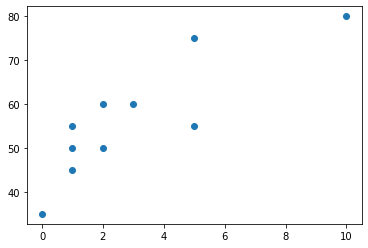

In [26]:
plt.scatter(X[:, 1], y);

In [27]:
y_pred1 = 5 * X[:, 1] + 35 * X[:, 0] 
y_pred2 = 7.5 * X[:, 1] + 40 * X[:, 0]

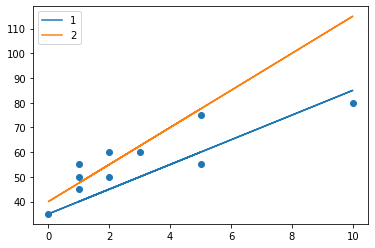

In [28]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1')
plt.plot(X[:, 1], y_pred2, label='2')
plt.legend()
plt.show()

In [29]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65, -60.0)

In [30]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(8.5, 9.0)

In [31]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

In [32]:
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [33]:
y_pred_analytical = W_analytical[0] * X[:, 0] + W_analytical[1] * X[:, 1]
y_pred_analytical = X @ W_analytical

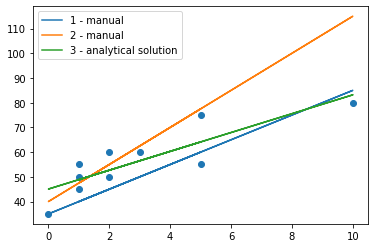

In [34]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1 - manual')
plt.plot(X[:, 1], y_pred2, label='2 - manual')
plt.plot(X[:, 1], y_pred_analytical, label='3 - analytical solution')
plt.legend()
plt.show()

In [35]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [36]:
calc_mae(y, y_pred_analytical), calc_mse(y, y_pred_analytical)

(5.787499999999998, 43.96875)

In [37]:
W = np.random.normal(size=(X.shape[1]))
W

array([-0.03510077, -0.82561501])

In [209]:
eta = 0.038 # величина шага

In [210]:
X.shape,  W.shape

((10, 2), (2,))

In [211]:
n = len(y)
dQ = 2/n * X.T @ (X @ W - y) # градиент функции ошибки
dQ

array([-17.28593379,   3.13183836])

In [227]:
grad = eta * dQ
grad

array([-0.65686548,  0.11900986])

In [228]:
print(f'previous weights', W)
W = W - grad
print(f'new weights', W)

previous weights [29.39330307  6.6543032 ]
new weights [30.05016856  6.53529334]


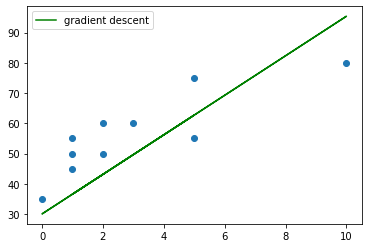

In [229]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

***Подберите скорость обучения (eta) и количество итераций***

In [237]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


In [251]:
n = X.shape[0]

eta = 0.035 #увеличил
n_iter = 300 #уменьшил

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 20 == 0: #увеличил
        eta /= 0.9 #уменьшил, но не уверен что так можно,но результат вышел минимальный
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.035        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 4.78  13.695], MSE = 3047.75
Iteration #20: W_new = [25.27841341  7.40003907], MSE = 242.13
Iteration #40: W_new = [36.20923227  5.4179036 ], MSE = 83.98
Iteration #60: W_new = [41.4466638   4.46817615], MSE = 50.7
Iteration #80: W_new = [43.7289521   4.05431835], MSE = 44.89
Iteration #100: W_new = [44.62365224  3.89207827], MSE = 44.07
Iteration #120: W_new = [44.93535704  3.83555542], MSE = 43.98
Iteration #140: W_new = [45.03055666  3.81829242], MSE = 43.97
Iteration #160: W_new = [45.05508995  3.81060781], MSE = 43.97
Iteration #180: W_new = [ -2997.06519784 -16772.50452808], MSE = 1083172019.97
Iteration #200: W_new = [-3.29930602e+11 -1.81945771e+12], MSE = 9.430591074611261e+24
Iteration #220: W_new = [-6.40555464e+20 -3.53245067e+21], MSE = 2.663902428477715e+43
Iteration #240: W_new = [-2.00895255e+31 -1.10787061e+32], MSE = 1.9838841603699535e+64
Iteration #260:

***В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее***

In [270]:
n = X.shape[0]

eta = 1e-2 
n_iter = 1000

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#    for k in range(W.shape[0]):
#    W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
#    W -= eta * (1/n * 2 * np.dot(X, y_pred - y))  
# старые строки
    W -= eta * (1/n * 2 * X[:, k] @ (y_pred - y)) #новая строка
    if i % 40 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 1.58], MSE = 3047.75
Iteration #40: W_new = [14.05778376 13.55778376], MSE = 801.45
Iteration #80: W_new = [14.48425481 13.98425481], MSE = 871.47
Iteration #120: W_new = [14.49943939 13.99943939], MSE = 874.15
Iteration #160: W_new = [14.49998004 13.99998004], MSE = 874.25
Iteration #200: W_new = [14.49999929 13.99999929], MSE = 874.25
Iteration #240: W_new = [14.49999997 13.99999997], MSE = 874.25
Iteration #280: W_new = [14.5 14. ], MSE = 874.25
Iteration #320: W_new = [14.5 14. ], MSE = 874.25
Iteration #360: W_new = [14.5 14. ], MSE = 874.25
Iteration #400: W_new = [14.5 14. ], MSE = 874.25
Iteration #440: W_new = [14.5 14. ], MSE = 874.25
Iteration #480: W_new = [14.5 14. ], MSE = 874.25
Iteration #520: W_new = [14.5 14. ], MSE = 874.25
Iteration #560: W_new = [14.5 14. ], MSE = 874.25
Iteration #600: W_new = [14.5 14. ], MSE = 874.25
Iteration #640: W_new = [14.5

 ***Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$ .***